In [32]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import datetime
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/BadgerX Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1DebF_UxJ8HVlNU3YtYGSpTlwMstdY3sb/BadgerX Data


In [33]:

import csv
import numpy as np

ave = np.array(list(csv.reader(open("narr2010ave.csv"))), dtype=float)
for i in range(1, 10):
  temp = np.array(list(csv.reader(open("narr201"+str(i) + "ave.csv"))),dtype=float)
  print(temp.shape)
  ave = np.concatenate((ave, temp), axis=0)


print(ave.shape)



(365, 57600)
(366, 57600)
(365, 57600)
(365, 57600)
(365, 57600)
(366, 57600)
(365, 57600)
(365, 57600)
(365, 57600)
(3652, 57600)


In [34]:
print(ave.shape)

(3652, 57600)


In [35]:
hum = ave[:, 0:120*120].reshape(3652*120*120)
prec = ave[:, 120**2:2*120**2].reshape(3652*120*120)
prec = prec[hum != 0]
hum = hum[hum != 0]
u_comp = ave[:, 2*120**2:3*120**2].reshape(3652*120*120)
u_comp = u_comp[u_comp!= 0]
v_comp = ave[:, 3*120**2:4*120**2].reshape(3652*120*120)
v_comp = v_comp[v_comp!= 0]

In [36]:
print(len(hum)/3652)
print(len(u_comp)/3652)
print(len(v_comp)/3652)
print(len(prec)/3652)

345.0
345.0
345.0
345.0


In [38]:
import pandas as pd
pd.DataFrame(hum).to_csv("fullHumidity.csv", header=None, index=False)
pd.DataFrame(prec).to_csv("fullPrecipitation.csv", header=None, index=False)
pd.DataFrame(u_comp).to_csv("fullu_comp.csv", header=None, index=False)
pd.DataFrame(v_comp).to_csv("fullv_comp.csv", header=None, index=False)




In [39]:
pd.DataFrame(hum).to_hdf("fullHumidity.hdf", key="hum", mode="w")
pd.DataFrame(prec).to_hdf("fullPrecipitation.hdf", key="prec", mode="w")
pd.DataFrame(u_comp).to_hdf("fullu_comp.hdf", key="u", mode="w")
pd.DataFrame(v_comp).to_hdf("fullv_comp.hdf", key="v", mode="w")

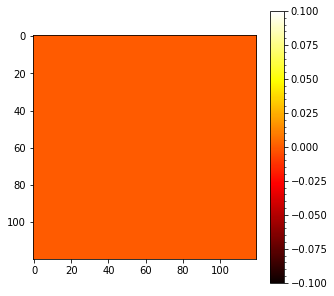

In [ ]:
fig, (ax1) = plt.subplots(figsize=(5,5), ncols=1)
lolol = ax1.imshow(np.array(ave[260][120*120:240*120]).reshape(120, 120), cmap='hot', interpolation='none')
cbar = fig.colorbar(lolol, ax=ax1)
cbar.minorticks_on()
plt.show()

In [ ]:



#process the u,v
for i in range(u.shape[0]):
  u[i] = np.mean(u[max(i-7, 0):i+1, :], axis=0)
  v[i] = np.mean(v[max(i-7, 0):i+1, :], axis=0)

#separate the tings
hum = ave[:, 0:120*120]
prec = ave[:, 120*120:2*120*120]
u = ave[:, 2*120*120:3*120*120]
v = ave[:, 3*120*120:4*120*120]


